<a href="https://colab.research.google.com/github/mas622424/neural-network-from-scratch/blob/main/Neural_network_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MNIST data

28x28 training images, 784 pixels overall.each pixel value between 0 to 255, 0 is black and 255 is white, we have m of these images and we can represent this as image

create a matrix with numpy and pandas representing the matrix, 784 rows and m columns

we take this image and do some processing , and do the prediction. we are gonna build a neural network with two nodes, 784 nodes input(zeroth) layer, 10 units hidden (first) layer and 10 units output(second) layer each corresponding to one digit.

there are three parts to training this network, the first part is forward propogation(take a image and run it hrough this network, and compute what is your output. A^[0] = X(784xm), A^[0] is the input layer. Z^[1](10xm) =W^[1](10x784)A^[1](784xm) + b^[1].(10x1).here z^[1] is first hidden layer.W^[1] is bunch of weights correspond to each of these 784 connections, and we are gonna add a constant bias node to each of the node, and we are gonna add a activation function to it , if we didnot apply this activation function, each node would be a linear combination of the nodes before + bias term.second layer will become linear combination of first layer , but first layer is already a linear combination of nodes of input layer, so the second layer will be linear combination of input layer, like the first hidden layer does not exist at all. So if you only have linear combinations, only weights and biases , we never gonna get a interesting function. and it is like we are doing a linear regression.So we apply a activation function, commonly used are tanh and sigmoid.(add graphs of both funtions).once you apply these functions, we you move to second layer more complexity is added and it is no longer linear.

I am using a another commonly used function (ReLU=Rectified Linear Unit)(add a graph).
A^[1]=g(Z^[1])=ReLU(Z^[1]).
then we move to layer 2 from layer 1,
Z^[2](10xm)=w^[2](10x10)A^[1](10xm) + b^[2](10x1), A^[2]=softmax(z^[2]), we applied softmax here,because we want the output layer to have a probability between 0 and 1.(add equation of the softmax function and graph of it).

what we need are good weights and biases to make these predictions, we use algorithms to run these weights and optimize them.we gonna use the backwards propagation.
once the prediction is done, we go in reverse order and check how much it deviated from the actual label and check the contribution of the weights and biases in this error, and adjust them.
dz^[2]=A^[2] - Y , dz^[2] is the error.then we are going to one hot encode the actual label.If we want to subtract four from the actual label , we donot subtract it directly , we encode the actual label and add 4 to the fourth index , representing fourth class of the matrix is one, everything else is zero.from there we use math to find contribution of w and b in this error.dw^[2](10x10)=[(dz^[2](10xm)A^[1](mx10))^T]/m , this is the derivative of loss function w.r.t weights in layer 2,
db^[2](10x1)=summation(dz^[2])/m, this is the average of the absolute error of the second layer.

similarly for the first hidden layer,
dz^[1](10xm)=[w^[2]]^T(10x10) dz^[2](10xm) * g'(z), we are taking the error from the second layer and applying the weights to it in reverse to get to it.we are also taking prime of activation function to undon the activation function to get the proper error for the first layer.we do the same to calculate how much w and b contributed to the error in first layer. dw^[1](10x784)=(dz^[1](10xm)x^T(mx784))/m, db^[1](10x1)=summation(dz^[1](10x1))/m.

after calculating everything, we update our terms accordingly, w^[1]=w^[1]-alpha(dw^[1]),  b^[1]=b^[1]-alpha(db^[1]),  w^[2]=w^[2]-alpha(dw^[2]),  b^[2]=b^[2]-alpha(db^[2]). alpha is learning rate.
alpha is a trained parameter, it is not trained by the model. when you run the cycle,when you run the gradient descent, the learning is a parameter we set, not the gradient descent set.

once we set , we go through the whole round again, we go through the forward propagation,make predictions,tweaking parameters untill the prediction is closer to the actual label.

In [ ]:
#importing libraries
import numpy as np # for linear algebra for working with matrices
import pandas as pd # for reading the data
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv('/content/train.csv') # loading pandas dataframe

In [ ]:
data.head() #preview of data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
data=np.array(data) # to manipulate data
#splitting data in to dev and training
m, n = data.shape # m-rows, n-columns
np.random.shuffle(data) #shuffling data
data_dev = data[0:1000].T #transposing dev data of first 1000 columns
Y_dev=data_dev[0] # extracting label
X_dev=data_dev[1:n] #extracting pixels
X_dev=X_dev / 255. #scaling
data_train = data[1000:m].T # transposing training data of remaining columns
Y_train=data_train[0] #extracting labels
X_train=data_train[1:n] #extracting data
X_train=X_train / 255. #scaling
_, m_train = X_train.shape # getting number of rows and columns

In [ ]:
def init_params():# this doesnot take any arguments because we creating it from scratch.
  w1 = np.random.randn(10, 784)-0.5 # intializing the w1,b1,w2,b2 randomly
  b1 = np.random.randn(10, 1)-0.5
  w2 = np.random.randn(10, 10)-0.5
  b2 = np.random.randn(10, 1)-0.5
  return w1, b1, w2, b2

def ReLU(z):
  return np.maximum(0, z) # writing the relu activation function from scratch

def softmax(z):
  return np.exp(z)/np.sum(np.exp(z)) # writing softmax activation function from scratch
def forward_prop(w1, b1, w2, b2, X):
  z1 = w1.dot(X) + b1
  A1 = ReLU(z1)                # forward propogation algorithm function
  z2 = w2.dot(A1) + b2
  A2 = softmax(A1)
  return z1, A1, z2, A2

def one_hot(Y):
  one_hot_Y = np.zeros((Y.size, Y.max()+1)) # one hot encoding of original labels
  one_hot_Y[np.arange(Y.size), Y] = 1
  one_hot_Y = one_hot_Y.T
  return one_hot_Y

def ReLU_deriv(z): # relu derivative function from scratch
  return z > 0
def backward_prop(z1, A1, z2, A2, w2, X, Y):
  one_hot_Y = one_hot(Y)
  dz2 = A2 - one_hot_Y
  dw2 = 1/m * dz2.dot(A1.T)   #backward propogation algorithm from scratch
  db2 = 1/m * np.sum(dz2)
  dz1 = w2.T.dot(dz2) * ReLU_deriv(z1)
  dw1 = 1/m * dz1.dot(X.T)
  db1 = 1/m * np.sum(dz1)
  return dw1, db1, dw2, db2

def update_params(w1, b1, w2, b2, dw1, db1, dw2, db2, alpha): # updating parameters function with learning rate and derivatives from scratch
  w1 = w1 - alpha * dw1
  b1 = b1 - alpha * db1
  w2 = w2 - alpha * dw2
  b2 = b2 - alpha * db2
  return w1, b1, w2, b2

In [ ]:
def get_predictions(A2):
  return np.argmax(A2, 0)  # getting our predictions

def get_accuracy(predictions, Y):
  print(predictions, Y)     #comparing predictions and original labels function
  return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, iterations, alpha): # gradient descent algorithm function
  w1, b1, w2, b2 = init_params()
  for i in range(iterations):
    z1, A1, z2, A2 = forward_prop(w1, b1, w2, b2, X)
    dw1, db1, dw2, db2 = backward_prop(z1, A1, z2, A2, w2, X, Y)
    w1, b1, w2, b2 = update_params(w1, b1, w2, b2, dw1, db1, dw2, db2, alpha)
    if i % 10 == 0:
      print("Iteration: ", i)
      predictions = get_predictions(A2)
      print(get_accuracy(predictions, Y))
  return w1, b1, w2, b2

In [ ]:
w1, b1, w2, b2 = gradient_descent(X_train, Y_train,  500, 0.10) # apply the gradient descent on the training data

Iteration:  0
[0 0 0 ... 0 0 0] [6 9 9 ... 0 8 3]
0.09858536585365854
Iteration:  10
[0 0 0 ... 0 0 0] [6 9 9 ... 0 8 3]
0.09858536585365854
Iteration:  20
[0 0 0 ... 0 0 0] [6 9 9 ... 0 8 3]
0.09858536585365854
Iteration:  30
[0 0 0 ... 0 0 0] [6 9 9 ... 0 8 3]
0.09858536585365854
Iteration:  40
[0 0 0 ... 0 0 0] [6 9 9 ... 0 8 3]
0.09858536585365854
Iteration:  50
[0 0 0 ... 0 0 0] [6 9 9 ... 0 8 3]
0.09858536585365854
Iteration:  60
[0 0 0 ... 0 0 0] [6 9 9 ... 0 8 3]
0.09858536585365854
Iteration:  70
[0 0 0 ... 0 0 0] [6 9 9 ... 0 8 3]
0.09858536585365854
Iteration:  80
[0 0 0 ... 0 0 0] [6 9 9 ... 0 8 3]
0.09858536585365854
Iteration:  90
[0 0 0 ... 0 0 0] [6 9 9 ... 0 8 3]
0.09858536585365854
Iteration:  100
[0 0 0 ... 0 0 0] [6 9 9 ... 0 8 3]
0.09858536585365854
Iteration:  110
[0 0 0 ... 0 0 0] [6 9 9 ... 0 8 3]
0.09858536585365854
Iteration:  120
[0 0 0 ... 0 0 0] [6 9 9 ... 0 8 3]
0.09858536585365854
Iteration:  130
[0 0 0 ... 0 0 0] [6 9 9 ... 0 8 3]
0.09858536585365854
Ite

In [ ]:
def make_predictions(X, w1, b1, w2, b2):  # making predictions
  _, _, _, A2 = forward_prop(w1, b1, w2, b2, X)
  predictions = get_predictions(A2)
  return predictions

def test_predictions(index, w1, b1, w2, b2): # printing the prediction and original label with its image
  current_image = X_train[:, index, None]
  prediction = make_predictions(X_train[:, index, None], w1, b1, w2, b2)
  label = Y_train[index]
  print("Prediction: ", prediction)
  print("Label: ", label)
  current_image = current_image.reshape((28, 28)) * 255
  plt.gray()
  plt.imshow(current_image, interpolation='nearest')
  plt.show()

Prediction:  [0]
Label:  6


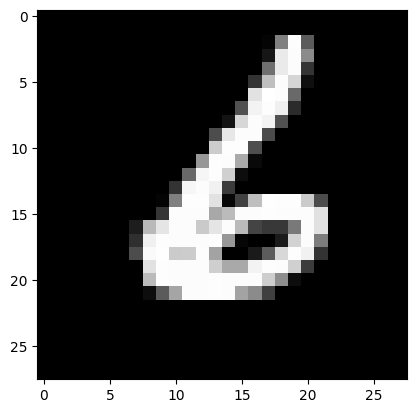

Prediction:  [0]
Label:  9


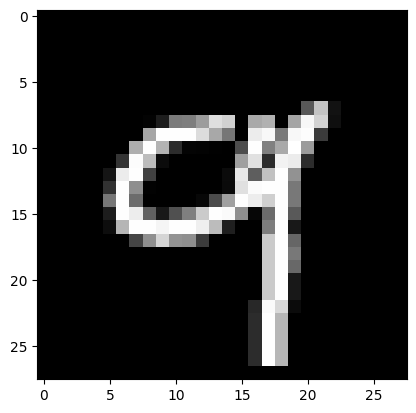

Prediction:  [0]
Label:  9


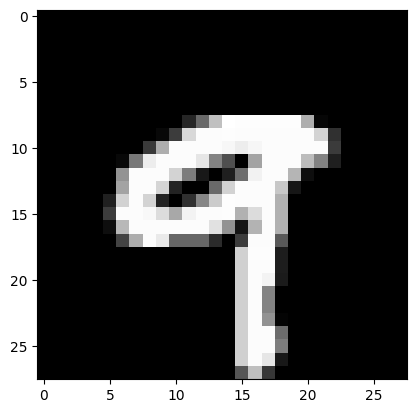

Prediction:  [0]
Label:  0


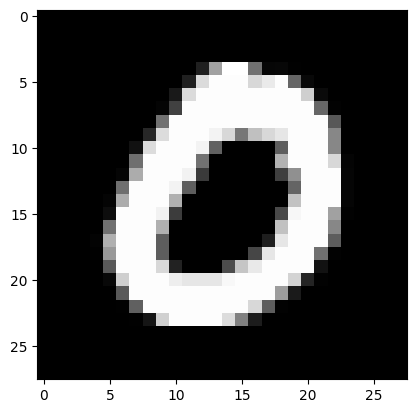

In [ ]:
test_predictions(0, w1, b1, w2, b2)
test_predictions(1, w1, b1, w2, b2)
test_predictions(2, w1, b1, w2, b2)
test_predictions(3, w1, b1, w2, b2)

In [ ]:
dev_predictions = make_predictions(X_dev, w1, b1, w2, b2) # making predictions on dev data
get_accuracy(dev_predictions, Y_dev) # comparing with original labels of dev data

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

np.float64(0.09)